## 1-导入数据

In [1]:
#  导入相关的工具 

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1-读取数据

In [2]:
data=pd.read_csv('./数分岗位信息.csv')
data.head()

,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程"
0,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划"
1,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学"
2,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,"
3,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师"
4,百川创意,数据分析工程师,长沙,8-13K,1-3年本科,互联网,"分配策略,数据分析工程师,业务发展趋势,业务分析,渠道"


### 1.2-读取数据，为数据添加行名称

In [3]:
data=pd.read_csv('./数分岗位信息.csv',names=['公司','职位','地区','薪资','学位','公司所属行业','职位要求能力'])
data.head()

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程"
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划"
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学"
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,"
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师"


In [4]:
#查看数据总体信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   公司      2537 non-null   object
 1   职位      2537 non-null   object
 2   地区      2537 non-null   object
 3   薪资      2537 non-null   object
 4   学位      2537 non-null   object
 5   公司所属行业  2537 non-null   object
 6   职位要求能力  2537 non-null   object
dtypes: object(7)
memory usage: 138.9+ KB


## 2-数据清洗

### 2.1-处理重复值

In [5]:
data[data.duplicated()]
print('重复数据数目为:',len(data[data.duplicated()]))

重复数据数目为: 11


In [6]:
#删除重复信息
data.drop_duplicates(inplace=True)
#查看数据总体信息，删除重复信息成功
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2526 entries, 0 to 2536
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   公司      2526 non-null   object
 1   职位      2526 non-null   object
 2   地区      2526 non-null   object
 3   薪资      2526 non-null   object
 4   学位      2526 non-null   object
 5   公司所属行业  2526 non-null   object
 6   职位要求能力  2526 non-null   object
dtypes: object(7)
memory usage: 157.9+ KB


### 2.2-针对薪资的清洗

In [7]:
data.head(30) # 目的是查看薪资这列 , 可以看到有多余的点 和"薪" 需要操作 

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程"
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划"
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学"
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,"
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师"
5,百川创意,数据分析工程师,长沙,8-13K,1-3年本科,互联网,"分配策略,数据分析工程师,业务发展趋势,业务分析,渠道"
6,新东方教育,数据分析专员(J15498),长沙,5-6K,1-3年本科,在线教育,"数据播报,数据分析专员,审核,合规,专项报告"
7,滴滴,数据分析专家,长沙,10-15K·15薪,3-5年大专,移动互联网,"数据挖掘,商业分析,异常提醒,建模,数据分析专家"
8,御强化妆品,数据分析师,长沙,8-10K·14薪,3-5年大专,电子商务,"数据分析师,电商平台,运营,行业情况,运营分析"
9,先康健康,产品数据分析师,长沙,7-9K,经验不限本科,学术/科研,"数据结构,大数据,产品数据分析,健康管理,系统数据分析"


In [8]:
# 重新做个新列的 薪数
def split_year(data):
    if '·' in data:
        index=data.find('·')  #  找到 ·的索引 
        df=data[index+1:] # 从索引的加一位开始  取到的是 比如 15薪 
    else:
        df='12薪'
    #返回值
    return df

data['薪数']=data['薪资'].map(split_year)

In [9]:
data.head(15)

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12薪
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12薪
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12薪
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12薪
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12薪
5,百川创意,数据分析工程师,长沙,8-13K,1-3年本科,互联网,"分配策略,数据分析工程师,业务发展趋势,业务分析,渠道",12薪
6,新东方教育,数据分析专员(J15498),长沙,5-6K,1-3年本科,在线教育,"数据播报,数据分析专员,审核,合规,专项报告",12薪
7,滴滴,数据分析专家,长沙,10-15K·15薪,3-5年大专,移动互联网,"数据挖掘,商业分析,异常提醒,建模,数据分析专家",15薪
8,御强化妆品,数据分析师,长沙,8-10K·14薪,3-5年大专,电子商务,"数据分析师,电商平台,运营,行业情况,运营分析",14薪
9,先康健康,产品数据分析师,长沙,7-9K,经验不限本科,学术/科研,"数据结构,大数据,产品数据分析,健康管理,系统数据分析",12薪


In [10]:
s = 'nihao'

s.find('i')

1

In [11]:
def split_salary(data):
    if 'K' in data.upper():  # 判断字符串中是否包含字符“K”（忽略大小写）
        # 获取索引
        index = data.find('K')  # 找到字符“K”的位置
        df = data[0:index]  # 提取从字符串开头到“K”之前的部分
    else:
        df = data  # 如果不包含“K”，则直接返回原始字符串
    # 返回值
    return df  # 返回处理后的字符串

In [12]:
data['薪资区间']=data['薪资'].map(split_salary)
data.head(30)

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数,薪资区间
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12薪,9-14
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12薪,2-3
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12薪,5-10
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12薪,3-8
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12薪,10-15
5,百川创意,数据分析工程师,长沙,8-13K,1-3年本科,互联网,"分配策略,数据分析工程师,业务发展趋势,业务分析,渠道",12薪,8-13
6,新东方教育,数据分析专员(J15498),长沙,5-6K,1-3年本科,在线教育,"数据播报,数据分析专员,审核,合规,专项报告",12薪,5-6
7,滴滴,数据分析专家,长沙,10-15K·15薪,3-5年大专,移动互联网,"数据挖掘,商业分析,异常提醒,建模,数据分析专家",15薪,10-15
8,御强化妆品,数据分析师,长沙,8-10K·14薪,3-5年大专,电子商务,"数据分析师,电商平台,运营,行业情况,运营分析",14薪,8-10
9,先康健康,产品数据分析师,长沙,7-9K,经验不限本科,学术/科研,"数据结构,大数据,产品数据分析,健康管理,系统数据分析",12薪,7-9


In [13]:
s = '9-14'

s.split('-')

['9', '14']

In [14]:
data['薪资区间']

0        9-14
1         2-3
2        5-10
3         3-8
4       10-15
        ...  
2532      6-8
2533     7-10
2534      6-8
2535      4-6
2536      4-6
Name: 薪资区间, Length: 2526, dtype: object

In [15]:
data['薪资区间'].str.split('-')

0        [9, 14]
1         [2, 3]
2        [5, 10]
3         [3, 8]
4       [10, 15]
          ...   
2532      [6, 8]
2533     [7, 10]
2534      [6, 8]
2535      [4, 6]
2536      [4, 6]
Name: 薪资区间, Length: 2526, dtype: object

In [16]:
data['薪资区间'].str.split('-',expand = True)  # expand 是为了等于一个 df形式 

,0,1
0,9,14
1,2,3
2,5,10
3,3,8
4,10,15
...,...,...
2532,6,8
2533,7,10
2534,6,8
2535,4,6


In [17]:
data['low_salary']=data['薪资区间'].str.split('-',expand = True)[0]
data['high_salary']=data['薪资区间'].str.split('-',expand = True)[1]

In [18]:
data['薪数']=data['薪数'].str.replace('薪','').astype('int')#去除字符串中的"薪"字符，并将剩下的部分转换为整数类型
data.head()

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15


In [19]:
data['low_salary']=data['low_salary'].astype('int')

In [20]:
#如果数据格式不一致，可以编写一个自定义函数来清理数据。

import re
def clean_salary(salary):
    try:
        # 提取数字部分
        return int(re.findall(r'\d+', salary)[0])
    except (IndexError, ValueError):
        # 如果找不到数字，返回 NaN
        return np.nan

# 应用自定义清理函数
data['high_salary'] = data['high_salary'].apply(clean_salary).fillna(0).astype(int)

In [21]:
data['high_salary']=data['high_salary'].astype('int')

In [22]:
# 删除 'high_salary' 列中包含 NaN 的行
data = data.dropna(subset=['high_salary'])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2526 entries, 0 to 2536
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   公司           2526 non-null   object
 1   职位           2526 non-null   object
 2   地区           2526 non-null   object
 3   薪资           2526 non-null   object
 4   学位           2526 non-null   object
 5   公司所属行业       2526 non-null   object
 6   职位要求能力       2526 non-null   object
 7   薪数           2526 non-null   int32 
 8   薪资区间         2526 non-null   object
 9   low_salary   2526 non-null   int32 
 10  high_salary  2526 non-null   int32 
dtypes: int32(3), object(8)
memory usage: 207.2+ KB


In [24]:
data.head()

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15


In [25]:
def avg_salary(low_salary,high_salary):
    return (low_salary+high_salary)/ 2

def func(row):
    return avg_salary(row['low_salary'],row['high_salary'])

data['avg_salary']=data.apply(func ,axis=1)

data.head()

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5


--- 

## 3-数据探索及可视化

### 3.1-观察薪资分布情况

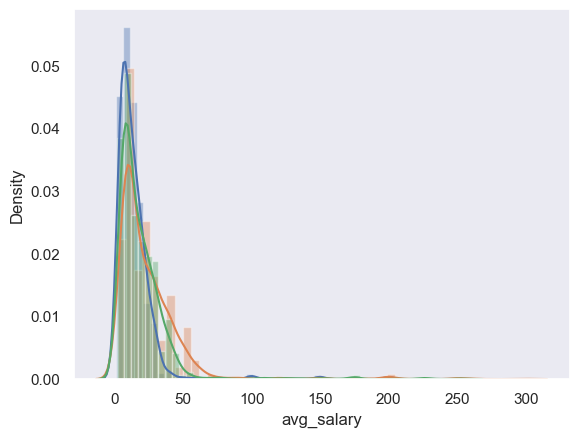

In [26]:
#观察薪资情况
import matplotlib.pyplot as plt
import seaborn as sns

#设置风格
sns.set(style='dark')
#画直方图
sns.distplot(data['low_salary'])
sns.distplot(data['high_salary'])
sns.distplot(data['avg_salary'])
#展示
plt.show()

### 3.2-分析地区对数据分析师薪资影响

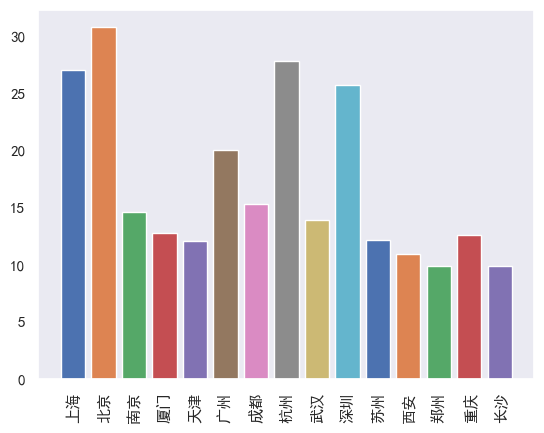

In [27]:
# 设置 Matplotlib 中的字体为 SimHei（黑体），用于正确显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei'] 

# 设置 Matplotlib 中的 unicode_minus 参数为 False，以防止负号显示为乱码
plt.rcParams['axes.unicode_minus'] = False   

# 分组操作，将数据按“地区”列进行分组
# 生成一个包含分组信息的对象，每个组包含相同“地区”的数据
groups = data.groupby(by='地区')  # 可以使用 list(groups) 查看分组后的数据

# 创建一个空列表，用于存储 x 轴的标签（各个地区的名称）
xticks = []

# 遍历每个分组，group_name 是组名（地区名称），group_df 是该组对应的数据
for group_name, group_df in groups:
    # 将组名（地区名称）添加到 xticks 列表中，作为 x 轴的标签
    xticks.append(group_name)
    # 绘制柱状图，x 轴位置为地区名称，高度为该地区的平均工资（avg_salary 的平均值）
    plt.bar(group_name, group_df.avg_salary.mean())

# 设置 x 轴的标签，xticks 列表中的值为标签内容，rotation=90 将标签旋转90度
plt.xticks(xticks, rotation=90)

# 显示绘制的柱状图
plt.show()

# 备注：从图形可以看出，北京、杭州和上海的平均工资最高，深圳排第四

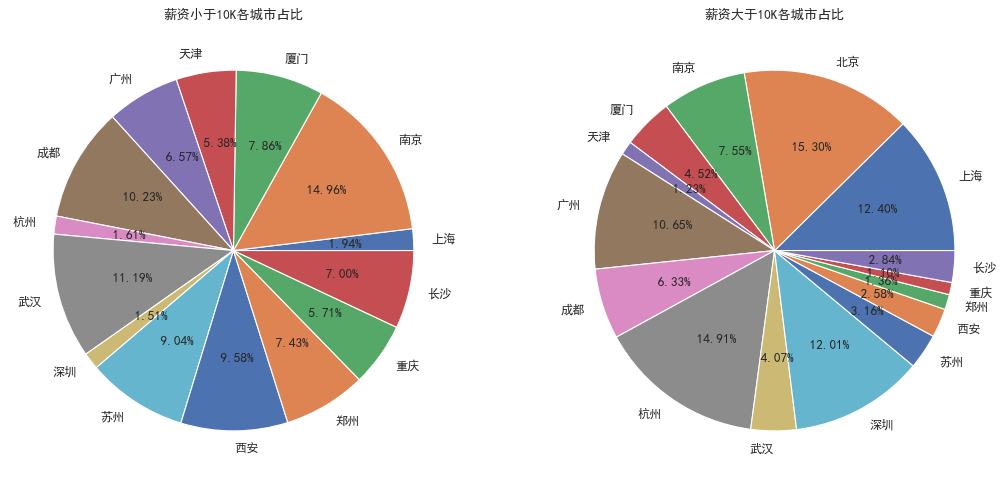

In [28]:
# 设置图形的大小为 16x16 英寸，分辨率为 80
plt.figure(figsize=(16, 16), dpi=80)

# 创建第一个子图（1行2列的第1个位置）
plt.subplot(121)

# 计算各个地区平均工资小于10的数量
# 首先筛选出平均工资小于10的数据，然后按“地区”分组，并统计每个地区的记录数量
temp = data[data.avg_salary < 10].groupby('地区').avg_salary.count()
# 绘制饼图，使用temp数据，标签为temp的索引（即地区名称），autopct='% .2f%%'表示显示百分比格式
plt.pie(temp, labels=temp.index, autopct='% .2f%%')
# 设置第一个子图的标题
plt.title('薪资小于10K各城市占比')

# 创建第二个子图（1行2列的第2个位置）
plt.subplot(122)
# 计算各个地区平均工资大于10的数量
# 首先筛选出平均工资大于10的数据，然后按“地区”分组，并统计每个地区的记录数量
temp = data[data.avg_salary > 10].groupby('地区').avg_salary.count()
# 绘制饼图，使用temp数据，标签为temp的索引（即地区名称），autopct='% .2f%%'表示显示百分比格式
plt.pie(temp, labels=temp.index, autopct='% .2f%%')
# 设置第二个子图的标题
plt.title('薪资大于10K各城市占比')

# 显示所有绘制的图形
plt.show()

In [29]:
# 学位对数据分析师的薪酬的影响
data.rename(columns={'学位':'学位经验'},inplace=True)
data.columns

Index(['公司', '职位', '地区', '薪资', '学位经验', '公司所属行业', '职位要求能力', '薪数', '薪资区间',
       'low_salary', 'high_salary', 'avg_salary'],
      dtype='object')

In [30]:
data.head()

,公司,职位,地区,薪资,学位经验,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5


In [31]:
data['学位']=data['学位经验'].str[-2:]
#从"学位经验"列中提取最后两个字符，并将这些提取的字符放入一个名为"学位"的新列
data.head()

,公司,职位,地区,薪资,学位经验,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary,学位
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5,本科
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5,不限
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5,大专
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5,大专
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5,本科


### 3.3-分组看学位所对应的薪资 

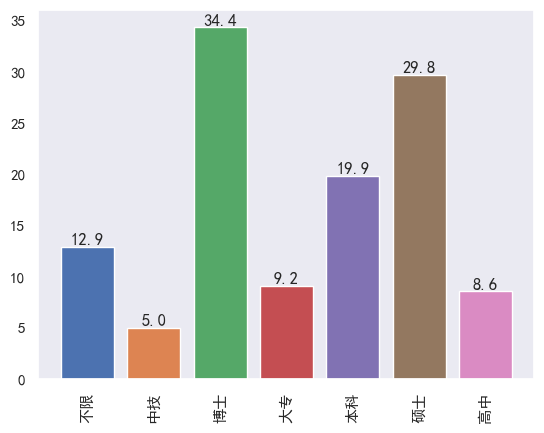

In [32]:
# 按照“学位”列进行分组，计算各学位对应的薪资
groups = data.groupby(by='学位')

# 创建两个空列表，用于存储x轴和y轴的刻度标签
xticks = []  # 存储x轴标签，即学位名称
yticks = []  # 存储y轴标签，即平均薪资

# 遍历每个分组，group_name 是组名（学位名称），group_df 是该组对应的数据
for group_name, group_df in groups:
    # 将学位名称添加到xticks列表中，作为x轴的标签
    xticks.append(group_name)
    # 将该学位的平均薪资添加到yticks列表中，作为y轴的值
    yticks.append(group_df.avg_salary.mean())
    # 绘制柱状图，x轴位置为学位名称，高度为该学位的平均薪资
    plt.bar(group_name, group_df.avg_salary.mean())

# 在柱状图的每个柱子上方显示具体的数值
for x, y in zip(xticks, yticks):
    plt.text(x, y, round(y, 1), va='bottom', ha='center')  # va='bottom'表示文字在柱子顶部，ha='center'表示水平居中

# 设置x轴的标签，xticks列表中的值为标签内容，并将标签旋转90度
plt.xticks(xticks, rotation=90)

# 显示绘制的柱状图
plt.show()

# 备注：可以从图形中看出，博士和硕士学位的薪资较高，说明高学历在提高薪资方面有积极作用

###  3.4-经验对数据分析师的薪酬的影响¶

In [33]:
data['经验']=data['学位经验'].str[:-2]

In [34]:
data.head(15)

,公司,职位,地区,薪资,学位经验,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary,学位,经验
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5,本科,1-3年
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5,不限,经验不限学历
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5,大专,经验不限
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5,大专,3-5年
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5,本科,经验不限
5,百川创意,数据分析工程师,长沙,8-13K,1-3年本科,互联网,"分配策略,数据分析工程师,业务发展趋势,业务分析,渠道",12,8-13,8,13,10.5,本科,1-3年
6,新东方教育,数据分析专员(J15498),长沙,5-6K,1-3年本科,在线教育,"数据播报,数据分析专员,审核,合规,专项报告",12,5-6,5,6,5.5,本科,1-3年
7,滴滴,数据分析专家,长沙,10-15K·15薪,3-5年大专,移动互联网,"数据挖掘,商业分析,异常提醒,建模,数据分析专家",15,10-15,10,15,12.5,大专,3-5年
8,御强化妆品,数据分析师,长沙,8-10K·14薪,3-5年大专,电子商务,"数据分析师,电商平台,运营,行业情况,运营分析",14,8-10,8,10,9.0,大专,3-5年
9,先康健康,产品数据分析师,长沙,7-9K,经验不限本科,学术/科研,"数据结构,大数据,产品数据分析,健康管理,系统数据分析",12,7-9,7,9,8.0,本科,经验不限


In [35]:
#要删除“职位”列中包含“实习”的行
data = data[~data['职位'].str.contains('实习', na=False)]

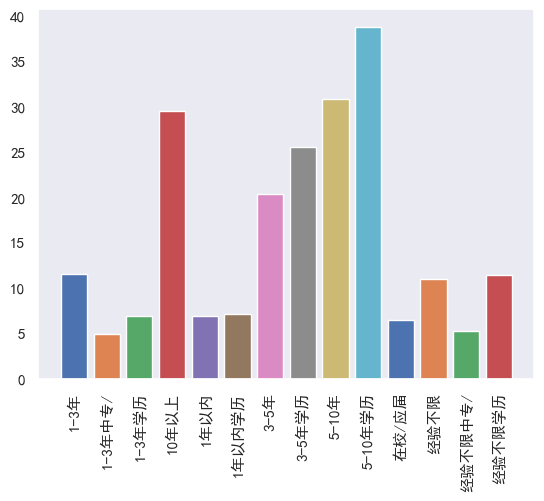

In [36]:
# 按照“经验”列进行分组，计算各经验水平对应的平均薪资
groups = data.groupby(by='经验')

# 创建一个空列表，用于存储x轴的刻度标签
xticks = []  # 存储x轴标签，即经验水平

# 遍历每个分组，group_name 是组名（经验水平），group_df 是该组对应的数据
for group_name, group_df in groups:
    # 将经验水平添加到xticks列表中，作为x轴的标签
    xticks.append(group_name)
    # 绘制柱状图，x轴位置为经验水平，高度为该经验水平的平均薪资
    plt.bar(group_name, group_df.avg_salary.mean())

# 设置x轴的标签，xticks列表中的值为标签内容，并将标签旋转90度，以防止标签重叠
plt.xticks(xticks, rotation=90)

# 显示绘制的柱状图
plt.show()

# 备注：从图形中可以看到，10年以上经验的薪资反而比5-10年的低，这可能说明在某些情况下
# 工资数据可能存在偏差，或者受到其他因素（如平台数据的准确性）影响

In [37]:
data['经验']=data['经验'].str.replace('学历','')
data['经验']=data['经验'].str.replace('中专/','')

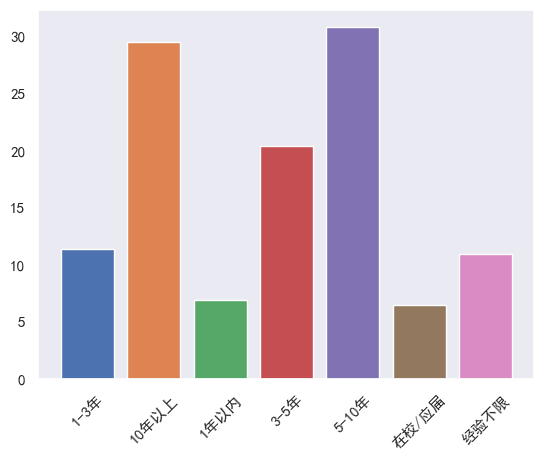

In [38]:
#分组
groups = data.groupby(by='经验')
#x轴标签
xticks = []
for group_name,group_df in groups:
    xticks.append(group_name)
    plt.bar(group_name,group_df.avg_salary.mean())
plt.xticks(xticks,rotation=45)
#展示图形，很奇怪为啥10年以上经验反而没有5-10年经验工资高
#有可能boss平台工资是有虚假的   
plt.show()

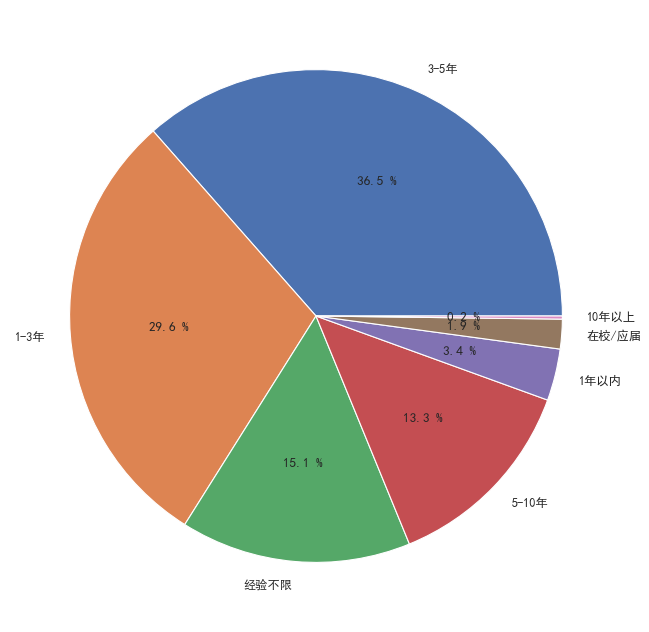

In [39]:
data1 = data['经验'].value_counts()
y=data1.values
plt.figure(figsize=(10,10),dpi=80)
plt.pie(y,labels=data1.index,autopct='%.1f %%')
plt.show()

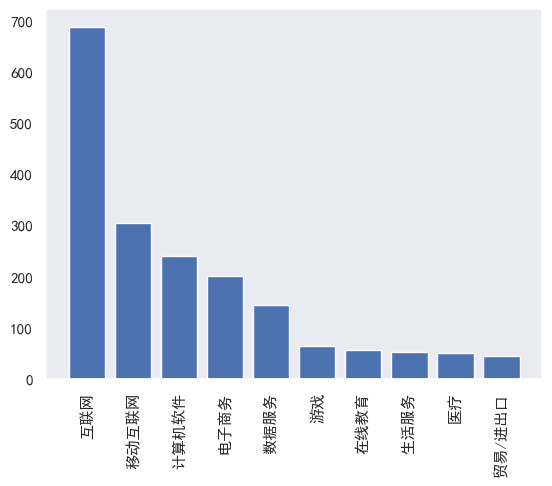

In [40]:
groups = data.groupby(by='公司所属行业')['avg_salary']
g = groups.size().sort_values(ascending=False)[:10]

plt.bar(g.index, g.values)
plt.xticks(rotation=90)
plt.show()

In [41]:
data.head()

,公司,职位,地区,薪资,学位经验,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary,学位,经验
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5,本科,1-3年
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5,不限,经验不限
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5,大专,经验不限
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5,大专,3-5年
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5,本科,经验不限


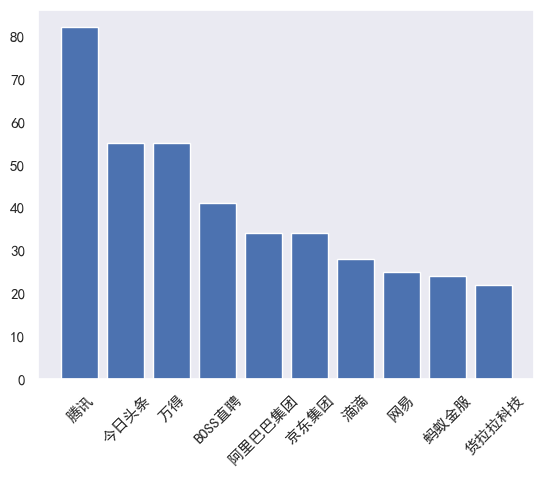

In [42]:
#  给的平均工资最高的前10个公司 
groups = data.groupby('公司')['avg_salary'].size().sort_values(
    ascending=False)[:10]
plt.bar(groups.index, groups.values)
plt.xticks(rotation=45)
plt.show()

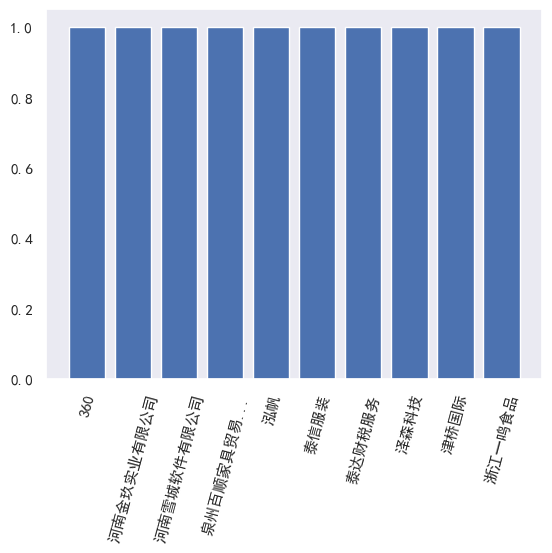

In [43]:
#  给的平均工资最低的前10个公司 
groups = data.groupby(by='公司')['avg_salary'].size().sort_values(
    )[:10]
plt.bar(groups.index, groups.values)
plt.xticks(rotation=75)
plt.show()

### 3.5-建立云图

In [44]:
# 字符串的拼接 
corpus = ' '.join(data['职位要求能力'])

In [45]:
corpus

'数据挖掘,大数据,工业数据,模型产品,特征工程 数据挖掘,数据分析师,店铺运营管理,战略目标,策划 SPSS,VBA,建模,数据分析师,统计学 Python,SQL,数据分析师,数据分析管理, 大数据,数据挖掘,数据仓库,商业数据分析,数据分析师 分配策略,数据分析工程师,业务发展趋势,业务分析,渠道 数据播报,数据分析专员,审核,合规,专项报告 数据挖掘,商业分析,异常提醒,建模,数据分析专家 数据分析师,电商平台,运营,行业情况,运营分析 数据结构,大数据,产品数据分析,健康管理,系统数据分析 SQL,Python,数据仓库,数据治理,数据开发 商业分析,数据挖掘,Python,SPSS,统计建模 MySQL,大数据,SQL,Python,需求规格说明 数据仓库,数据挖掘,商业分析,预警机制,工具改进 商业分析,数据挖掘,审计分析,数据分析师,负责项目 Excel,能独立,产品项目,相关资料收集,撰写报告 SQL,数据分析师,计算机相关,全日制本科及以上学历,数据中台 资料保密,数据分析岗,收集汇总,各项指标,整理汇总 SQLServer,分配策略,数据分析师,业务发展趋势,业务分析 数据挖掘,商业数据分析,数据分析工程师,项目负责人,渠道 数据分析师,店铺运营,运营操作,电子商务,大专或本科 Excel,SQL,数据仓库,分布式技术,商业智能 SQL,Python,数据挖掘,大数据,转化路径 商业分析,数据挖掘,商业,数据分析工程师,零售服务 数据分析工程师,负责建立,数学模型,大数据,数学建模 统计学,数据挖掘,Python,数据分析师,电子商务 数据化,数据分析师,业务数据,行为数据,部门总监 数据挖掘,业务提升,建模,数据分析师,行业发展动态 R语言,Python,数据挖掘,数据挖掘算法,数据分析师 数据挖掘,销售数据分析,销售数据,业务数据分析,业务分析 仓库环境,HQL,BI,数据分析师,业务部门 数据分析员,费用统计,门店,档案收集,微信群 深入分析,数据分析师,客户业务,资源优化,提供数据支持 Hive,计算机相关专业本科以上学历,企业决策,获取成本,数据分析师 数据仓库,SQL,Hive,策略输出,互联网数据分析 SQL,商业智能,数据分析师,用户画像,计算机 数据挖掘,数据分析师,全国门店,外卖平台,团购平台 数据挖掘,数据处理,Hive,

In [46]:
# 把逗号进行相应的替换 
corpus = corpus.replace(',', '')

In [47]:
!pip install wordcloud

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


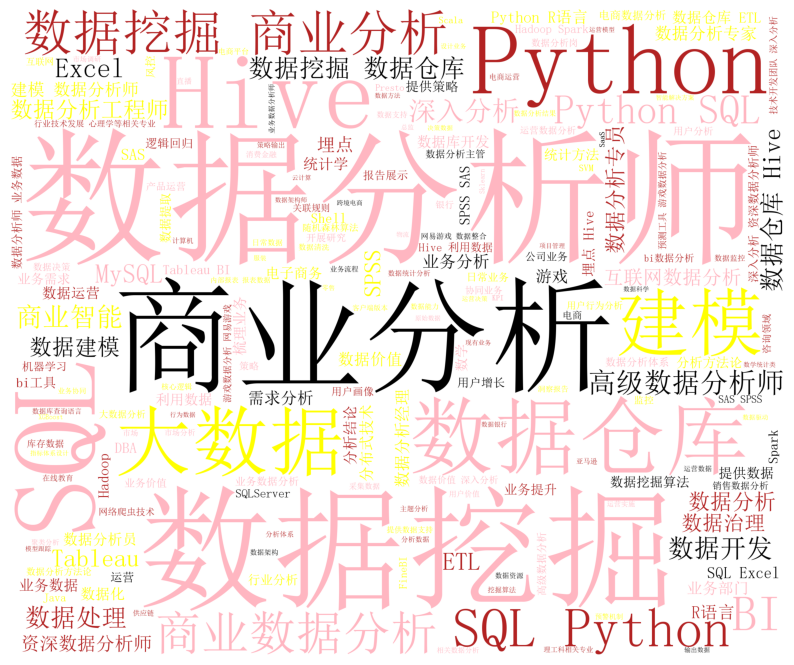

In [48]:
from matplotlib import colors

color_list = ['#FFB6C1','#FFFF00','#B22222','#000000']

c = colors.ListedColormap(color_list)

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                         background_color='white',
                         width=2400,
                         height=2000,
                         colormap= c,
                         font_path=r'C:\Windows\Fonts\simsun.ttc').generate(
                             corpus, )



#绘制职位要求能力云图
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)  #  imshow()接收一张图像，只是画出该图，并不会立刻显示出来(pycharm中,notebook可以显示)
plt.axis('off')
plt.show()